In [17]:
# Make a function that loads the energies of each row in the .db file and the atom, upon which the adsorbate OH sits
import sys
sys.path.append('../scripts')
import pandas as pd
from ase.db import connect
from Slab import expand_triangle, Slab, inside_triangle

def load_adsorption_data(db_path):
    """
    Load the energies and adsorption sites for each row in a .db file.

    Args:
        db_path (str): Path to the .db file.

    Returns:
        pandas.DataFrame: A DataFrame with columns for the energy, the symbol of the
        adsorbate atom, the index of the adsorbate atom, the symbol of the adsorption site
        atom, and the index of the adsorption site atom.
    """
    # Connect to the database file
    db = connect(db_path)

    # Create an empty list to store the data
    data = []

    # Iterate over each row in the database file
    for row in db.select():
        # Get the energy for this row
        energy = row.energy
        #Get the row idx
        row_idx = row.idx
        #Set the adsorbate
        ads = "OH"
        # Get atoms object
        atoms = db.get_atoms(row.id)
        # Make slab instance
        slab = Slab(atoms, ads=ads, ads_atom='O')
        site_elems, site = slab.get_adsorption_site(radius=2.6, hollow_radius=2.6)
        
        # Append the data to the list
        data.append({
            'energy': energy,
            'idx': row_idx,
            'site_element':site_elems[0] ,
            'site':site 
        })

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)

    return df

def load_selected_energies(db_path, idx_list):
    # Connect to the database
    conn = connect(db_path)

    # Create an empty list to store the energies
    
    data = {'idx': [], 'energy': []}

    # Iterate over the rows and extract the energy if the idx matches
    for row in conn.select():
        if row.idx in idx_list:
            data["energy"].append(row.energy)
            data["idx"].append(row.idx)
        
    # Convert the energies to a Pandas DataFrame
    df = pd.DataFrame(data)

    # Return the DataFrame
    return df

OH_df = load_adsorption_data("../Experiments/PUK_data/OH_out.db")
#Remove bridge sites
OH_df = OH_df[OH_df.site == "ontop"]
# #Fetch the indices
OH_idx_list = OH_df["idx"].tolist()
slabs_df = load_selected_energies("../Experiments/PUK_data/slabs_out_OH_O.db", OH_idx_list)
# 
OH_df = OH_df.sort_values(by='idx')
slabs_df = slabs_df.sort_values(by='idx')

In [24]:
OH_df["diff"] = OH_df["energy"].to_numpy() - slabs_df["energy"].to_numpy()

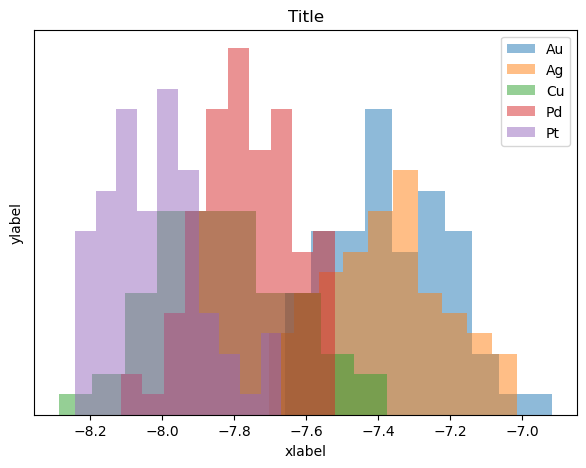

In [35]:
import matplotlib.pyplot as plt
metals = ["Au", "Ag", "Cu", "Pd", "Pt"]

fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
ax.set_title(f"Title")
ax.set_yticks([])
ax.set_ylabel("ylabel")
ax.set_xlabel("xlabel")
#plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
#fig.show()


for metal in metals:
    deltaEs = OH_df[OH_df.site_element == metal]["diff"].tolist()
    ax.hist(deltaEs, alpha = 0.5, label = metal)

ax.legend()
plt.show()

In [25]:
OH_df

,energy,idx,site_element,site,diff
135,-73.013351,25,Au,ontop,-7.403278
146,-76.439606,27,Pt,ontop,-8.061489
206,-72.153208,28,Ag,ontop,-7.322202
145,-65.962927,29,Au,ontop,-7.331728
143,-76.734610,30,Pt,ontop,-7.707885
...,...,...,...,...,...
270,-77.415208,516,Ag,ontop,-7.148037
369,-72.075390,517,Au,ontop,-7.422467
294,-70.730529,518,Ag,ontop,-7.330773
269,-69.027344,519,Pd,ontop,-7.892517


In [19]:
slabs_df

,idx,energy
0,25,-65.610073
2,27,-68.378117
1,28,-64.831006
5,29,-58.631199
3,30,-69.026724
...,...,...
367,516,-70.267170
368,517,-64.652923
369,518,-63.399756
370,519,-61.134827


In [42]:
load_adsorption_data("../Experiments/PUK_data/OH_out.db")

,energy,idx,site_element,site
0,-70.892022,200,[Pt],ontop
1,-74.157203,246,[Ag],ontop
2,-70.271818,196,[Cu],ontop
3,-74.787576,379,[Pd],ontop
4,-71.688891,171,[Pt],ontop
...,...,...,...,...
390,-73.482858,524,"[Ag, Cu]",bridge
391,-70.211359,476,"[Cu, Pd]",bridge
392,-71.171647,82,"[Pd, Pd]",bridge
393,-76.514491,47,[Au],ontop


In [41]:
OH_df

,energy,idx,site_element,site
135,-73.013351,25,[Au],ontop
146,-76.439606,27,[Pt],ontop
206,-72.153208,28,[Ag],ontop
145,-65.962927,29,[Au],ontop
143,-76.734610,30,[Pt],ontop
...,...,...,...,...
369,-72.075390,517,[Au],ontop
294,-70.730529,518,[Ag],ontop
269,-69.027344,519,[Pd],ontop
320,-73.625723,521,[Pt],ontop


In [34]:
OH_df = load_adsorption_data("../Experiments/PUK_data/OH_out.db")
OH_df

,energy,adsorbate_symbol,adsorbate_idx,adsorption_site_symbol,adsorption_site_idx,idx
0,-70.892022,H,21,Ag,19,200
1,-74.157203,H,21,Pt,19,246
2,-70.271818,H,21,Pd,19,196
3,-74.787576,H,21,Pd,19,379
4,-71.688891,H,21,Cu,19,171
...,...,...,...,...,...,...
390,-73.482858,H,21,Ag,19,524
391,-70.211359,H,21,Pd,19,476
392,-71.171647,H,21,Pt,19,82
393,-76.514491,H,21,Pt,19,47


In [31]:
OH_df

,energy,adsorbate_symbol,adsorbate_idx,adsorption_site_symbol,adsorption_site_idx,idx
135,-73.013351,H,21,Cu,19,25
146,-76.439606,H,21,Cu,19,27
206,-72.153208,H,21,Au,19,28
145,-65.962927,H,21,Cu,19,29
143,-76.734610,H,21,Cu,19,30
...,...,...,...,...,...,...
369,-72.075390,H,21,Pt,19,517
294,-70.730529,H,21,Ag,19,518
269,-69.027344,H,21,Cu,19,519
320,-73.625723,H,21,Pd,19,521


In [32]:
slabs_df

,idx,energy
0,25,-65.610073
2,27,-68.378117
1,28,-64.831006
5,29,-58.631199
3,30,-69.026724
...,...,...
386,517,-64.652923
387,518,-63.399756
388,519,-61.134827
389,521,-65.537239


In [33]:
OH_OH_df["energy"] - slabs_df["energy"]

0      -5.281949
1      -9.326198
2      -1.893701
3      -5.760851
4      -0.505204
         ...    
390    -8.142504
391   -10.253498
392    -9.410858
393   -14.837948
394    -3.968378
Name: energy, Length: 395, dtype: float64